In [ ]:
"""
Name: Heart Disease Dectector

Date: 02/01/2025

Author: Phong Thai

Program Descrption:
This program train multiple machine learning models to be compared in
terms of their performance when it comes to predicting heart diseases in
patients. Hyperparameter tuning is performed to maximize such performance
within the model that has the highest recall and accuracy for detecting
the features that predispose patients to heart diseases. At the end,
feature importances are anylized, along with correlations. Results shows
which features in the heart disease dataset are particularly important
when it comes to detecting whether a person has a heart disease or not.

The dataset used for this project only has numerical features so 
pre-processing is skipped.

Key focus on feature importances: training, comparing, evaluating, 
                                  analyzing.

Packages used for this project: pandas, matplotlib, seaborn, numpy,
                                scikit-learn
"""

In [2]:
import pandas as pd
import sklearn

In [3]:
df = pd.read_csv("heart_disease_dataset.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [18]:
#Take this data, turn it into x and y and do a train test split.

In [5]:
from sklearn.model_selection import train_test_split

X, y = df.drop("target", axis=1), df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=9)

In [15]:
"""
X, y data. The data when we drop the targets is going to be X.
                             y is going to be just the target.


Trained test split is going to be X_train, X_test, y_train, y_test
splitting X and y. The test size is 40% instead of the typical 20% because
we're going to make it a little difficult by providing the model less data.
Training on 60% of the data (instead of the usual 80%). Evaluate on 40%. 
"""

### Training

In [ ]:
"""                        


             STARTING WITH SCALE-INSENSITIVE TRAINING MODELS
             
                
Some of the models don't really care about scale.
Such models would be: Random Forest CLassifier
                      naive_bayes GaussianNB
                      Gradient Boosting Classifier

Scale-dependent models usually involves distance measurements. 
"""

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=9)
forest.fit(X_train, y_train)
#We're going to train this RandomForestClassifier on (X_train, y_train)

RandomForestClassifier(random_state=9)

In [7]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Now we have 3 models trained on the data. 
# Before we evaluate them, we're going to add 3 more that are scale-sensitive

In [ ]:
"""                        


                         SCALE-SENSITIVE MODELS
                    

Models include: Kneighbors Classifier
                Logistic Regression (is a classification despite its name)
                SVC (Support Vector Classifier)
"""

In [26]:
"""
First, scale the data:
We're going to create an instance of StandardScaler() class, and we're
going to scale our training data.
We're going to fit the scaler on the data and also transform the data.

We're going to always use the default hyper parameter and then tune the
model that performs best. 

Why we're NOT scaling the 'y' data is because 'knn' and all the other 
models are ONLY focusing on the INPUT.
The output doesn't really matter, the output is what the model produces.
We ONLY need to scale: the TRAINING data, so, the INPUT of train data.
                       the TEST data, so, the INPUT of the test data.
"""

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [12]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

### Evaluation

In [45]:
# Now we have 6 models. We're going to EVALUATE them in terms of ACCURACY.

In [60]:
forest.score(X_test, y_test)

0.9853658536585366

In [57]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [15]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [16]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [17]:
log.score(X_test_scaled, y_test)

0.8731707317073171

In [18]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

In [ ]:
# We can see Random Forest performs best, then Gradient Boost, then SVC.
# In terms of ACCURACY, forest is the best to use.

"""
Recall vs. Accuracy vs. Precision:
  - Accuracy: how many of our OVERALL guesses are correct about our
              prediction.
  - Precision: when we declare 'someone has a disease', how often when
               we say 'someone a disease' are we correct about that.
               Precision is not about how many guesses we have.
  - Recall: percentage of whether or not we're able to detect ALL the
            instances of heart disease.
            
"""


# Accuracy: 100 patients --outof100guesses--> 80 correct --> 80% accuracy.
# Precision: 200 patients --> we say 100 has disease -> 20 out of those 100 is correct --> 20% precision.

              """Recalls asks HOW MANY of them do we FIND?"""
# Precision: 200 patients -> we say 200 has disease -> 100 actually have.
# Precision = 50%
# Recall    = 100%
"""
  If we always guess 'yes', it's not intelligent. But for machine learning,
  RECALL IS WAY MORE IMPORTANT because we want to spot ALL the patients
  with heart disease. As long as Recall is 100%, precision DON'T matter.

  It's okay to say someone has a heart disease but they actually don't.
  It's problematic to say someone don't have a disease but they DO.

  False positive disease test is better than False negative disease test.

"""

In [51]:
# Now, we're going to EVALUATE how the models perform in terms of RECALLS.

In [ ]:
"""
Prediction of the model is = going to be making predictions on the
X_test data.
Then we're going to say that Model: recall score is = going to be
the recall_score of the (ACTUAL results, and predictions)
"""

In [19]:
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print("Forest:", recall_score(y_test, y_preds))

y_preds = nb_clf.predict(X_test)
print("NB:", recall_score(y_test, y_preds))

y_preds = gb_clf.predict(X_test)
print("GB:", recall_score(y_test, y_preds))


y_preds = knn.predict(X_test_scaled)
print("KNN:", recall_score(y_test, y_preds))

y_preds = log.predict(X_test_scaled)
print("LOG:", recall_score(y_test, y_preds))

y_preds = svc.predict(X_test_scaled)
print("SVC:", recall_score(y_test, y_preds))

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
LOG: 0.92018779342723
SVC: 0.9530516431924883


In [ ]:
# For Recall, Forest and Gradient Booster is the best choice.
# But because Forest has more accuracy than GB, we'll focus on Forest.

"""
Before we get started on hyperparameter tuning to improve model accuracy
and its performance to optimize it across different data-

We'll plot another metric which is the ROC and the area under the curve.
This is a plot that plots the: false positive rate on x-axis
                               TRUE positive rate on the y-axis (RECALL)
The curve of the plot is going to show the the trade-offs between the two.

We uses cross-validation or validation sets to do hyperparameter tuning
as hyperparameters are algorithm-specific and can't be calculated from
the data we're using. 

In [ ]:
 


#                                 Plot




In [ ]:
"""
We're going to call the probabilities from forest by calling the 
predict_proba() function.
We're going to say based on the X_test data. Make predictions. 

Then we're going to plot the curve of that with false and true positive
rates, and the thresholds. By calling the roc_curve onto y_test, y_probs.

ROC = Receiver Operating Characteristics
"""

In [ ]:
"""
The idea of having probabilities is that: we get some probabilities and
then we say, okay, after a CERTAIN probability, we're going to classify
this 'has a disease' as a YES.
And anything below that probability, we're going to say NO.

We ask ourselves what thresholds leads to what kind of fpr and tpr, and
we're going to plot this trade-off.
"""

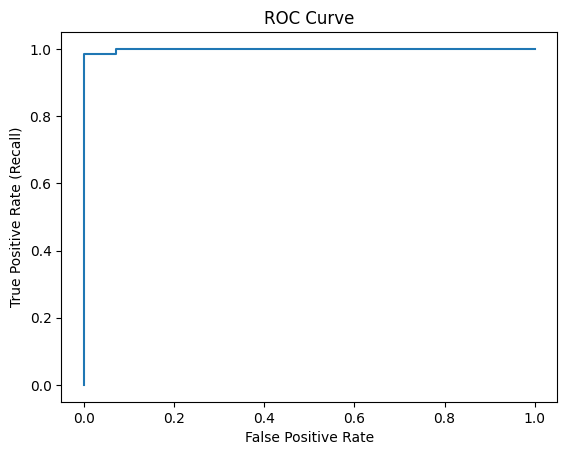

In [20]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

In [21]:
roc_auc_score(y_test, y_probs)

np.float64(0.9989990705655251)

In [ ]:
#This tells us the model performs quite well.
#Having an AUC (Area Under Curve) of 1 is excellent.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


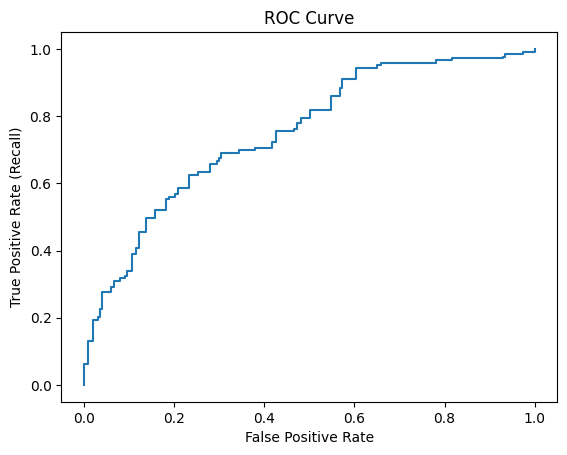

In [22]:
y_probs = log.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

In [23]:
roc_auc_score(y_test, y_probs)

np.float64(0.7505064226305379)

In [ ]:
"""
Compared to forest, for log, we'd have to make false positive guesses 75% 
of the time just to get to 100% of the recall.
"""

### Hyperparameter Tuning

In [ ]:
"""
cv=  stands for cross-validation.
cv=3 cross validates 3 times, (3 fold cross-validation)

All data split into 3 (folds): □□□
1st cv: □□■    (training, training, evaluate)
2nd cv: □■□    (training, evaluate, training)
3rd cv: ■□□    (evaluate, training, training)

One combination of parameters in param_grid = Candidates per one fold
param_grid =  3 
            x 4
            x 3 
            x 3 
            x 3 
           = 324 candidates x 3 forests = 972 fits
           
1 combination = 1 fold(□) = 324 candidates
cv=3 meands for every combination of parameters, we'd do it 3 times.

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200 , 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [27]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_spl

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

In [ ]:
# Model n_estimator = 500 is the best even when other parameteres are out.
"""
param_grid = {
    "n_estimators": [100, 200 , 500, 600, 700],
}

forest = RandomForestClassifier(n_jobs=-1, random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)
"""
# Would still give us best_forest = n_estimators = 500

In [ ]:

#                     Evaluating the two Forest models


In [62]:
"""
Check to see if this best_forest outperforms the other forest from the
beginning.
"""

best_forest.score(X_test, y_test)

0.9853658536585366

In [61]:
forest.score(X_test, y_test)

0.9853658536585366

Forest: 0.9859154929577465
Best Forest: 0.9859154929577465


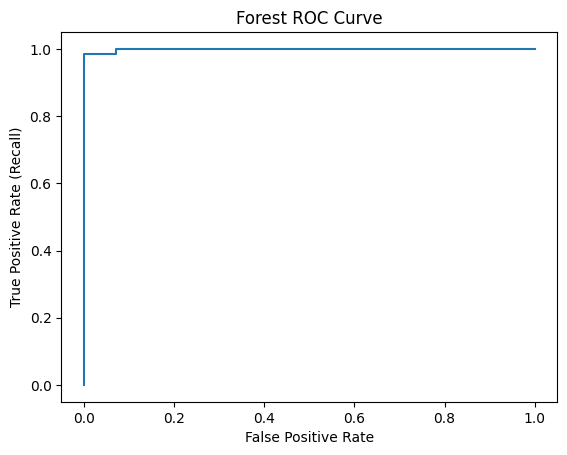

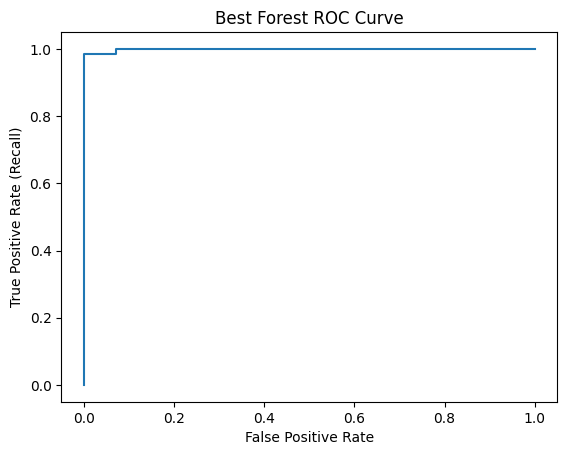

In [66]:
"""
They got the same score().
Check to see if they also have the same recall, or just check the ROC.
"""
y_preds = forest.predict(X_test)
print("Forest:", recall_score(y_test, y_preds))

y_preds = best_forest.predict(X_test)
print("Best Forest:", recall_score(y_test, y_preds))

y_probs = forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Forest ROC Curve")
plt.show()

y_probs = best_forest.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Best Forest ROC Curve")
plt.show()

### Feature Importance Analysis

In [ ]:
"""
plt.cm.YlGn  Yellow to Green, most extreme color for largest value.
barh = bar horizontal(sorted _features y-axis, sorted importances x-axis.
"""

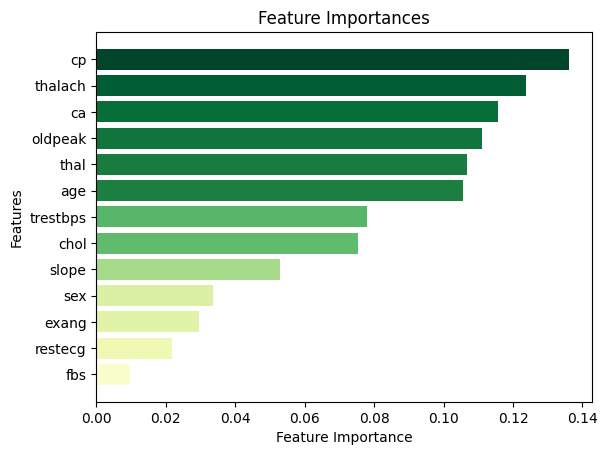

In [32]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

In [ ]:
"""
From this visualization, we can see that there are certain features being
way more important than other features as a factor for heart disease.

Before we analyze this graph, we're going to take a look at the 
correlations of these features before we do any random forest 
classifications.

It's good to know that the map for correlation doesn't have to be exactly
the same as the feature importances.
"""

In [35]:
import seaborn as sns

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
"""
sns.heatmap  shows a two dimensional (2D) data in graphical format. We're
just graphing the correlation with this function.

annot=True   let us see the values/numbers inside the heatmap
cmap=        color map

<Axes: >

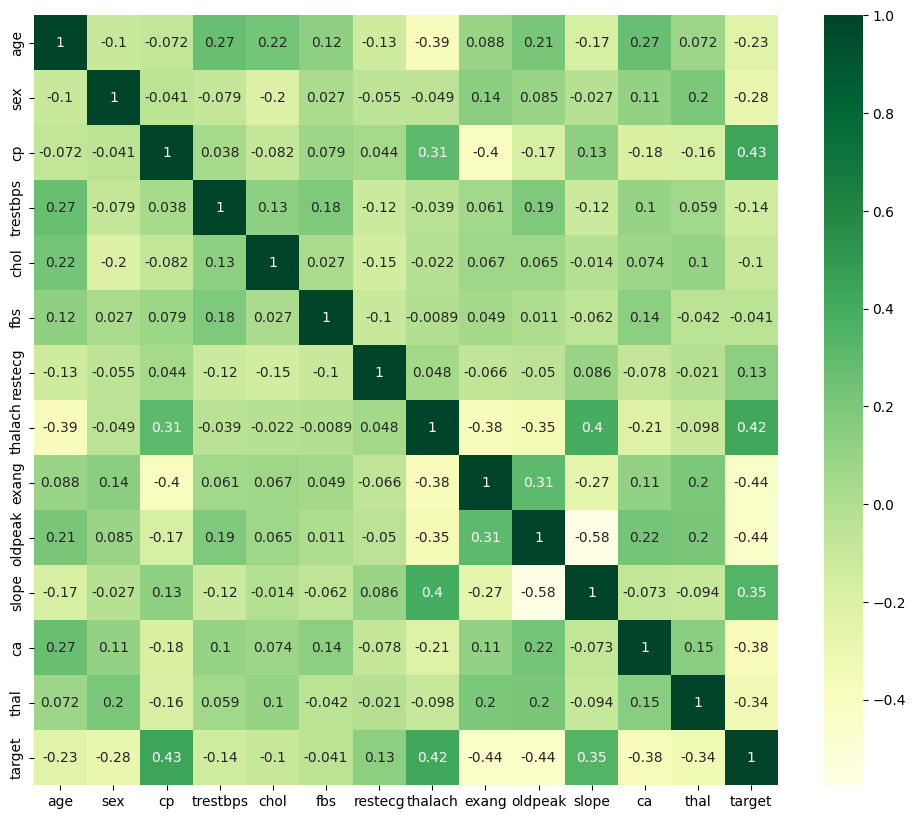

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGn")

In [ ]:
# This is the correlations BEFORE we do any training.
"""
This is how the data correlates. 
We can see the "target" correlates very strongly at oldpeak/exang/thalach. 
Negative values doesn't mean there's no correlation. It just means they
are indirectly proportionate, it correlates the other way around.

If we want a clearer correlation map with only the MAGNITUDE of the 
correlation, we can apply  abs() function onto  df.corr()
Meaning we're not interested in HOW they correlates (negative/positive),
only in there magnitude.
"""

<Axes: >

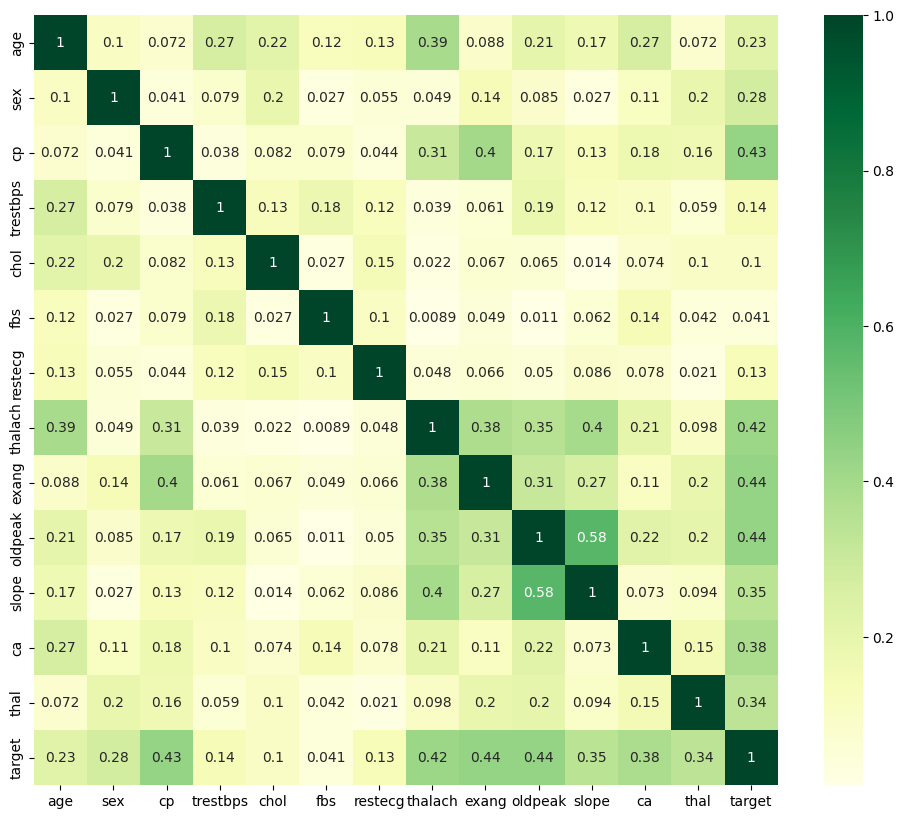

In [49]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap="YlGn")

In [ ]:
"""
We can see the STRONGEST correlation between the "target" variables and
the other features are between exang (exercise induced angina)
                           and oldpeak (ST depression induced by exercise

By CORRELATION, these two features SHOULD be the MOST important features
in whether or not a person has heart dicease. 

HOWEVER, when we look at our barh for sorted_features and 
feature_importances, it shows that the MOST important features are
cp (TYPE of chest pain) > thalach (max heart rate) > ca (# major vessels)

So, exang/oldpeak does not seem important AT ALL for the
RandomForestClassifier. But, it has a very strong correlation.
"""

In [ ]:
 


#                              Conclusion



"""
Feature Importances and Correlation doesn't always nessecarily equal.

Strong correlation does NOT mean it's important for decision-making 
when it comes to classifying whether someone has a heart disease or not.
"""

### Results

In [ ]:
best_forest.predict()

In [ ]:
best_forest.predict_proba()